In [50]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from pydataset import data

import acquire
import prepare

### Create a new notebook, knn_model, and work with the titanic dataset to answer the following:



In [51]:
titanic = acquire.get_titanic_data()
titanic.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1


In [52]:
train, validate, test = prepare.clean_titanic(titanic)
train.shape, validate.shape, test.shape

((498, 12), (214, 12), (179, 12))

In [53]:
# SPLIT DATA INTO X AND Y DATA SETS
X_train = train.drop(columns=['survived', 'sex', 'embark_town'])

X_validate = validate.drop(columns=['survived','sex','embark_town'])

X_test = test.drop(columns=['survived','sex','embark_town'])

y_train = train.survived

y_validate = validate.survived 

y_test = test.survived

### 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)



In [54]:
knn5 = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn5.fit(X_train, y_train)
y_pred = knn5.predict(X_train)

In [55]:
y_pred_proba = knn5.predict_proba(X_train)

### 2. Evaluate your results using the model score, confusion matrix, and classification report.



In [56]:
print('Accuracy of KNN5 classifier on training set: {:.2f}'
     .format(knn5.score(X_train, y_train)))


Accuracy of KNN5 classifier on training set: 0.79


In [57]:
print(confusion_matrix(y_train, y_pred))


[[262  45]
 [ 59 132]]


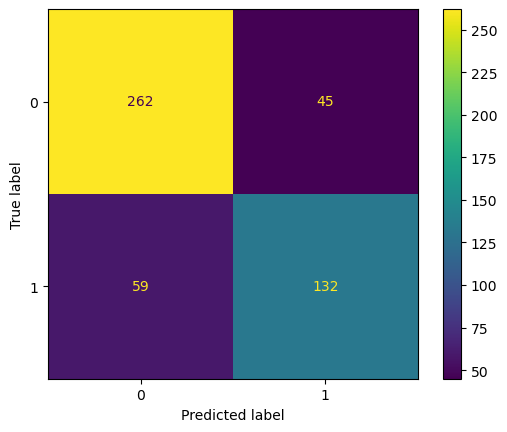

In [58]:
cm5 = confusion_matrix(y_train, y_pred)
cm5_disp = ConfusionMatrixDisplay(cm5, display_labels=knn5.classes_)
cm5_disp.plot()
plt.show()

In [59]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       307
           1       0.75      0.69      0.72       191

    accuracy                           0.79       498
   macro avg       0.78      0.77      0.78       498
weighted avg       0.79      0.79      0.79       498



### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [60]:
def compute_metrics(TN,FP,FN,TP):
    all_ = (TP + TN + FP + FN)

    accuracy = (TP + TN) / all_

    TPR = recall = TP / (TP + FN)
    FPR = FP / (FP + TN)

    TNR = TN / (FP + TN)
    FNR = FN / (FN + TP)

    precision =  TP / (TP + FP)
    f1 =  2 * ((precision * recall) / ( precision + recall))

    support_pos = TP + FN
    support_neg = FP + TN

    print(f"Accuracy: {accuracy}\n")
    print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
    print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
    print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
    print(f"False Negative Rate/Miss Rate: {FNR}\n")
    print(f"Precision/PPV: {precision}")
    print(f"F1 Score: {f1}\n")
    print(f"Support (0): {support_pos}")
    print(f"Support (1): {support_neg}")

In [61]:
confu5 = confusion_matrix(y_train,y_pred)
TN, FP, FN, TP = confu5.ravel()
TN, FP, FN, TP 

(262, 45, 59, 132)

In [62]:
compute_metrics(TN, FP, FN, TP)

Accuracy: 0.7911646586345381

True Positive Rate/Sensitivity/Recall/Power: 0.6910994764397905
False Positive Rate/False Alarm Ratio/Fall-out: 0.1465798045602606
True Negative Rate/Specificity/Selectivity: 0.8534201954397395
False Negative Rate/Miss Rate: 0.3089005235602094

Precision/PPV: 0.7457627118644068
F1 Score: 0.7173913043478262

Support (0): 191
Support (1): 307


### 4. Run through steps 1-3 setting k to 10



In [63]:
knn10 = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn10.fit(X_train, y_train)
y_pred2 = knn10.predict(X_train)

In [64]:
y_pred2_proba = knn10.predict_proba(X_train)

In [65]:
print('Accuracy of KNN10 classifier on training set: {:.2f}'
     .format(knn10.score(X_train, y_train)))

Accuracy of KNN10 classifier on training set: 0.74


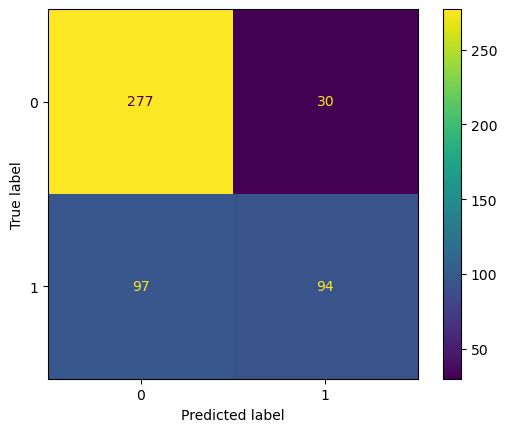

In [66]:
cm10 = confusion_matrix(y_train, y_pred2)
cm10_disp = ConfusionMatrixDisplay(cm10, display_labels=knn10.classes_)
cm10_disp.plot()
plt.show()

In [67]:
confu10 = confusion_matrix(y_train,y_pred2)
TN, FP, FN, TP = confu10.ravel()
TN, FP, FN, TP 

(277, 30, 97, 94)

In [68]:
compute_metrics(TN, FP, FN, TP)

Accuracy: 0.7449799196787149

True Positive Rate/Sensitivity/Recall/Power: 0.49214659685863876
False Positive Rate/False Alarm Ratio/Fall-out: 0.09771986970684039
True Negative Rate/Specificity/Selectivity: 0.9022801302931596
False Negative Rate/Miss Rate: 0.5078534031413613

Precision/PPV: 0.7580645161290323
F1 Score: 0.5968253968253969

Support (0): 191
Support (1): 307


In [69]:
print(classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       307
           1       0.76      0.49      0.60       191

    accuracy                           0.74       498
   macro avg       0.75      0.70      0.71       498
weighted avg       0.75      0.74      0.73       498



### 5. Run through steps 1-3 setting k to 20



In [70]:
knn20 = KNeighborsClassifier(n_neighbors=20, weights='uniform')
knn20.fit(X_train, y_train)
y_pred3 = knn20.predict(X_train)
y_pred3_proba = knn20.predict_proba(X_train)

print('Accuracy of KNN20 classifier on training set: {:.2f}'
     .format(knn20.score(X_train, y_train)))

Accuracy of KNN20 classifier on training set: 0.72


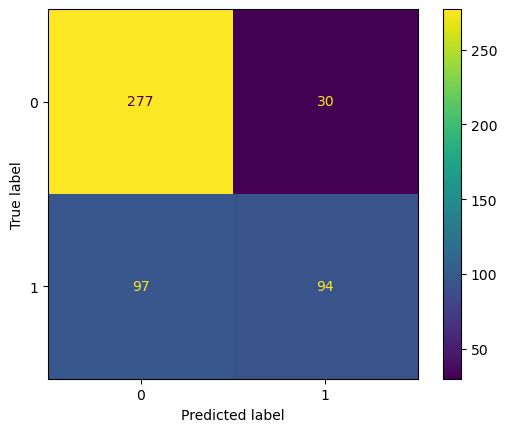

In [71]:
cm20 = confusion_matrix(y_train, y_pred3)
cm20_disp = ConfusionMatrixDisplay(cm10, display_labels=knn20.classes_)
cm20_disp.plot()
plt.show()

In [72]:
confu20 = confusion_matrix(y_train,y_pred3)
TN, FP, FN, TP = confu20.ravel()
TN, FP, FN, TP 

(278, 29, 108, 83)

In [73]:
compute_metrics(TN, FP, FN, TP)

Accuracy: 0.7248995983935743

True Positive Rate/Sensitivity/Recall/Power: 0.43455497382198954
False Positive Rate/False Alarm Ratio/Fall-out: 0.09446254071661238
True Negative Rate/Specificity/Selectivity: 0.9055374592833876
False Negative Rate/Miss Rate: 0.5654450261780105

Precision/PPV: 0.7410714285714286
F1 Score: 0.5478547854785478

Support (0): 191
Support (1): 307


### 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?



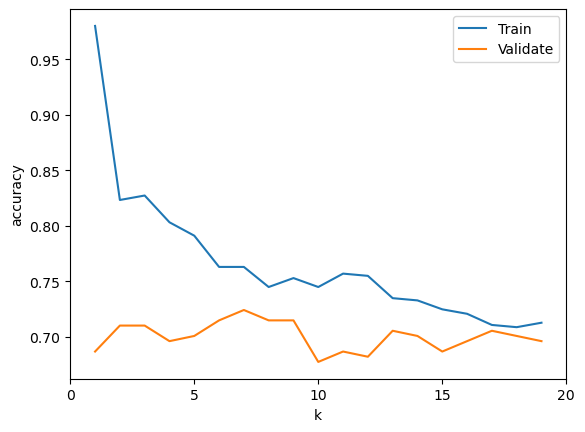

In [75]:
k_range = range(1, 20)
train_scores = []
validate_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    validate_scores.append(knn.score(X_validate, y_validate))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_scores, label='Train')
plt.plot(k_range, validate_scores, label='Validate')
plt.legend()
plt.xticks([0,5,10,15,20])
plt.show()

### 7. Which model performs best on our out-of-sample data from validate?

In [79]:
print('Accuracy of KNN (k=5) classifier on validate set: {:.2f}'
     .format(knn5.score(X_validate, y_validate)))

print('Accuracy of KNN (k=10) classifier on validate set: {:.2f}'
     .format(knn10.score(X_validate, y_validate)))

print('Accuracy of KNN (k=20) classifier on validate set: {:.2f}'
     .format(knn20.score(X_validate, y_validate)))

print('Difference of KNN (k=5) between Train and Validate Set: {:.2f}'
      .format((knn5.score(X_train, y_train)) - (knn5.score(X_validate, y_validate))))

print('Difference of KNN (k=10) between Train and Validate Set: {:.2f}'
      .format((knn10.score(X_train, y_train)) - (knn10.score(X_validate, y_validate))))

print('Difference of KNN (k=20) between Train and Validate Set: {:.2f}'
      .format((knn20.score(X_train, y_train)) - (knn20.score(X_validate, y_validate))))





Accuracy of KNN (k=5) classifier on validate set: 0.70
Accuracy of KNN (k=10) classifier on validate set: 0.68
Accuracy of KNN (k=20) classifier on validate set: 0.71
Difference of KNN (k=5) between Train and Validate Set: 0.09
Difference of KNN (k=10) between Train and Validate Set: 0.07
Difference of KNN (k=20) between Train and Validate Set: 0.02


        It looks like KNN where k = 20 will be the best bet.